In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as seaborn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
infile = 'EctosQuantitativeFinal.csv'
#######
ectos = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variale, if that is what you called it, example: data 
ectos.head()

,Number,Species,Tail,Sex,Condition,Weight,Length,N.fasciatus,Fleas,Ticks,I.scapularis,I.brunneus,I.dentatus,Recaptures
0,179,Pman,stripe,female,vo,20,85,1,1,0,0,0,0,2
1,180,Pman,stripe,female,nr,13,75,0,0,0,0,0,0,2
2,181,Pman,stripe,male,td,20,89,1,1,0,0,0,0,3
3,183,Pman,stripe,female,vo,20,90,2,2,0,0,0,0,2
4,184,Pman,stripe,female,vo,19,84,1,1,0,0,0,0,2


In [3]:
ectofile = ectos
ectofilefiltered = ectofile[ectofile.Recaptures>0]
x = ectofilefiltered[["Fleas", "Ticks"]]
y = ectofilefiltered[["Recaptures"]]
print(np.shape(x))
print(np.shape(y))

#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

(71, 2)
(71, 1)


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range (7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes)
        mlp = MLPRegressor(hidden_layer_sizes=(layers,nodes), max_iter=500, random_state=4)
        mlp.fit(x_train, y_train)
        trainres = mlp.score(x_train, y_train)
        predictions = mlp.predict(x_test)
        accresults = mlp.score(x_test, y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved = []
print(results)

c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A col

[[7, 7, 0.04249326825901989, 0.034343438175846286], [7, 8, 0.014225567144040885, -0.07003826549675751], [7, 9, 0.08252705817563233, 0.057805525095987575], [8, 7, 0.06335552924895882, 0.0492012842618903], [8, 8, 0.11102549351173152, 0.07864665681608052], [8, 9, 0.0837352210322998, 0.03522391311799877], [9, 7, 0.0749104388235059, 0.034019143858750156], [9, 8, 0.10553977207983523, 0.0815514564264106], [9, 9, 0.08025561672215131, 0.008449048010347737]]


c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hicksonc\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_mult

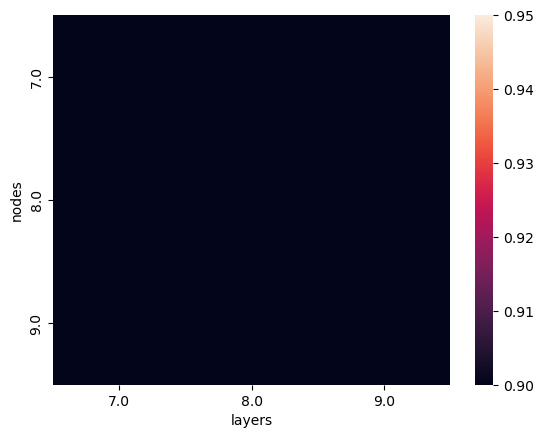

In [ ]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='Z')
ax = sns.heatmap(data_pivoted,vmin=0.9, vmax=0.95)
plt.show()